In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('practical-1-data.csv')
df.head()

,Unnamed: 0,Date,Store,Product_Category,Units_Sold,Unit_Price,Revenue
0,0,2024-01-01,Store A,Grocery,122,399.29,48713.38
1,1,2024-01-01,Store A,Clothing,34,367.34,12489.56
2,2,2024-01-01,Store A,Electronics,40,82.23,3289.20
3,3,2024-01-01,Store A,Home,94,232.33,21839.02
4,4,2024-01-01,Store B,Grocery,136,302.55,41146.80


### What is the total revenue generated by each store?

In [4]:
total_revn = df.groupby('Store')['Revenue'].sum()

In [5]:
total_revn

Store
Store A    1320489.26
Store B    1579873.44
Store C    1381597.64
Name: Revenue, dtype: float64

### Which product category has the highest average unit price?

In [7]:
df.groupby('Product_Category')['Unit_Price'].mean().sort_values(ascending=False)

Product_Category
Home           270.133056
Clothing       269.347500
Electronics    255.303333
Grocery        235.477222
Name: Unit_Price, dtype: float64

### How does revenue trend over the months of 2024?

Text(0, 0.5, 'Sales')

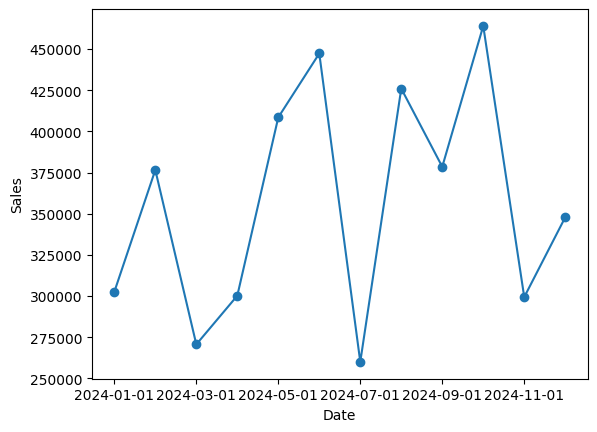

In [11]:
monthly_revenue = df.groupby('Date')['Revenue'].sum()

monthly_revenue.plot(marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')

### Which month had the highest overall sales revenue?

In [16]:
monthly_revenue.idxmax()  # index max

'2024-10-01'

In [14]:
monthly_revenue

Date
2024-01-01    302594.41
2024-02-01    376611.08
2024-03-01    270668.10
2024-04-01    300243.53
2024-05-01    408556.01
2024-06-01    447356.52
2024-07-01    260029.31
2024-08-01    426027.22
2024-09-01    378534.44
2024-10-01    464086.72
2024-11-01    299397.41
2024-12-01    347855.59
Name: Revenue, dtype: float64

### What is the average units sold per category per store?

In [17]:
df.groupby(['Store', 'Product_Category'])['Units_Sold'].mean()

Store    Product_Category
Store A  Clothing            119.416667
         Electronics         104.583333
         Grocery             115.833333
         Home                112.750000
Store B  Clothing            142.750000
         Electronics         140.583333
         Grocery             106.416667
         Home                 96.416667
Store C  Clothing             97.666667
         Electronics         119.500000
         Grocery              92.833333
         Home                113.833333
Name: Units_Sold, dtype: float64

### Which store sold the most units overall?

In [20]:
df.groupby('Store')['Units_Sold'].sum().sort_values(ascending=False)

Store
Store B    5834
Store A    5431
Store C    5086
Name: Units_Sold, dtype: int64

### Is there a seasonal trend in any product category?

In [24]:
category_trends = df.groupby(['Date', 'Product_Category'])['Revenue'].sum().unstack()

<Axes: xlabel='Date'>

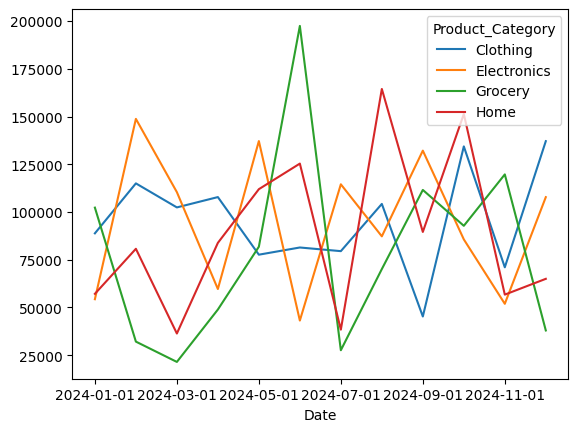

In [25]:
category_trends.plot()

### Compare the revenue of all categories for each store using a bar chart.

In [26]:
compare_revenue = df.groupby(['Store', 'Product_Category'])['Revenue'].sum().unstack()

<Axes: xlabel='Store'>

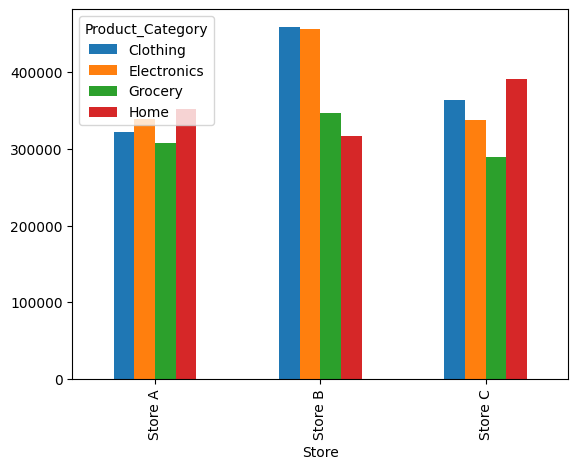

In [27]:
compare_revenue.plot(kind='bar')

### Find correlation between units sold and revenue.

In [29]:
df['Units_Sold'].corr(df['Revenue'])

np.float64(0.618378615325684)

### Plot a line chart showing monthly revenue per store.